In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
os.listdir('./data')

['right', 'bed', 'wow', 'stop', 'bird', 'seven', 'up', 'yes']

In [3]:
import IPython.display as ipd
ipd.Audio('./data/yes/0a7c2a8d_nohash_0.wav')

In [4]:
train_audio_path = './data'
labels=os.listdir(train_audio_path)

In [5]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

right
bed
wow
stop
bird
seven
up
yes


In [6]:
#Plot Time Series
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

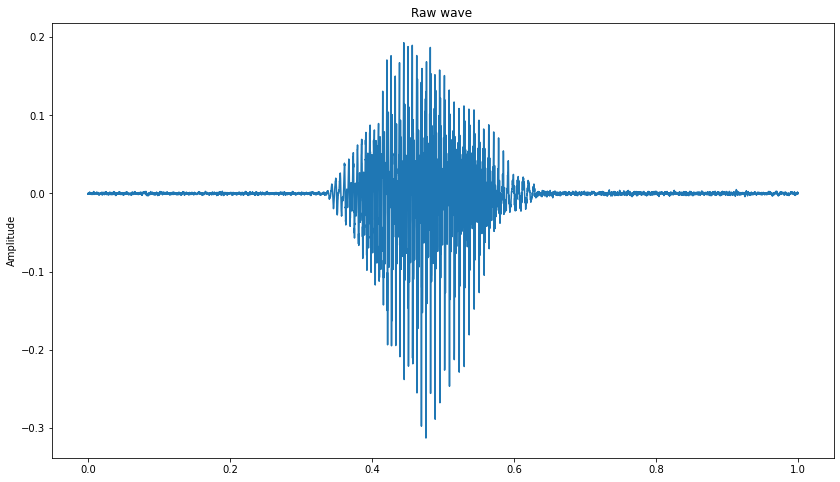

In [7]:
sound = samples
plot_time_series(sound)

In [9]:
#Shifting Time
def manipulate(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

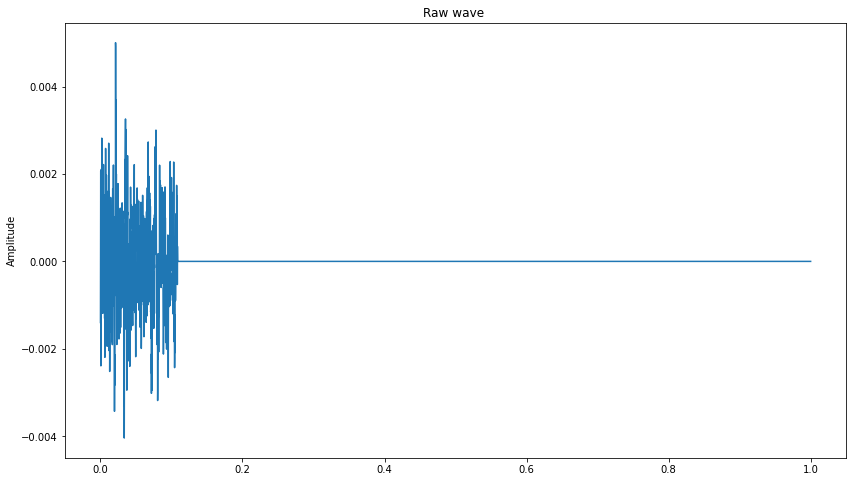

In [13]:
sound1 = manipulate(sound,8000,1,'right')
plot_time_series(sound1)

In [14]:
# Changing Pitch
import librosa
def manipulate1(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

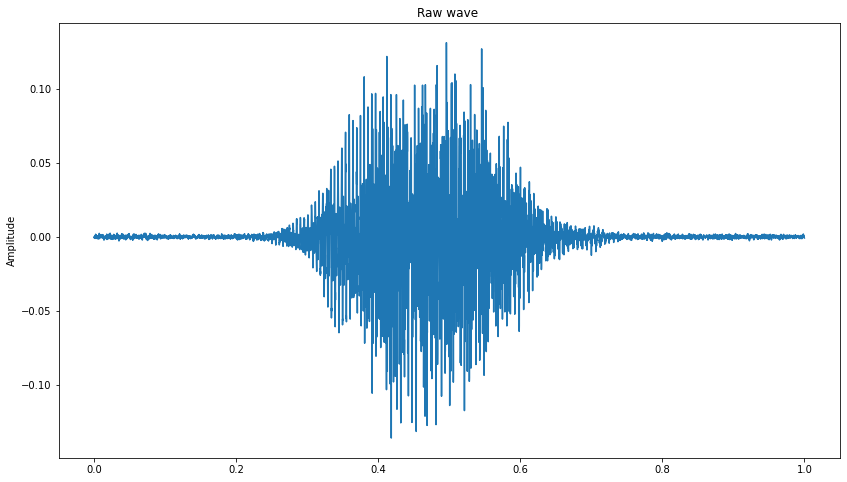

In [15]:
sound2 = manipulate1(sound,8000,2)
plot_time_series(sound2)

In [16]:
#Changing Speed
import librosa
def manipulate2(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

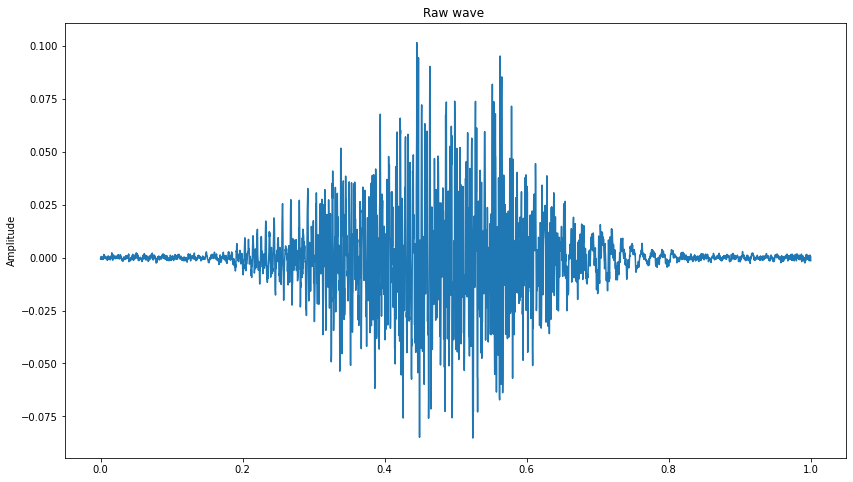

In [17]:
sound3 = manipulate2(sound,2)
plot_time_series(sound3)

In [18]:
#Noise Injection
import numpy as np
def manipulate4(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

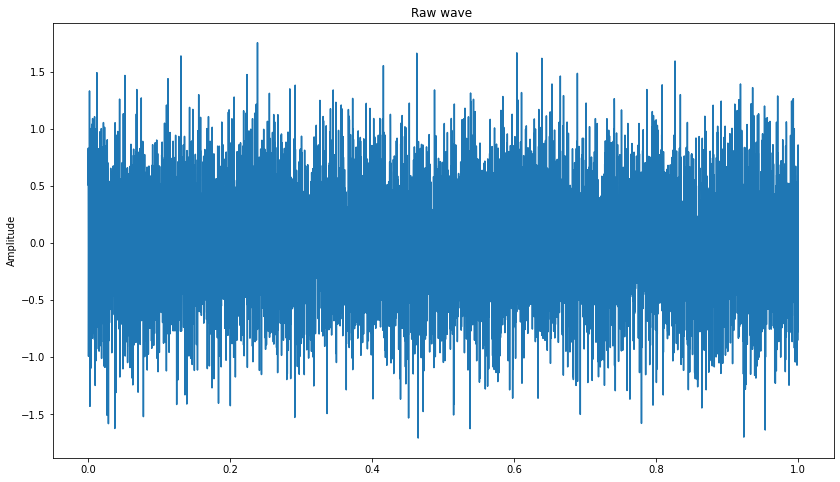

In [19]:
sound4 = manipulate4(sound,0.5)
plot_time_series(sound4)